<a href="https://colab.research.google.com/github/hncpyj/AI4Code/blob/main/AI4Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI4Code**

해당 코드는 kaggle의 퍼블릭 코드로 올려진 AI4CODE_EDA 코드를 해석하며 복기하였습니다.

https://www.kaggle.com/code/santosh1974/ai4code-eda

1. **Dependencies**

In [ ]:
# General Libraries 

import os
import json
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.notebook import tqdm, trange
import seaborn as sns # Seaborn is the only library we need to import for this example. By convention, it is imported with the shorthand sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Text Processing Libraries 

# re는 RegularExpreseeion 모듈이며, 일치하는 문자열을 검색할 수 있는 함수 집합을 제공한다.
import re
# string 모듈은 일부 문자열 상수에 빠르게 액세스하는 데 도움된다.
import string
# NLTK는 언어 데이터로 작동하는 프로그램을 빌드하기 위한 라이브러리다.
# 분류, 토큰화, 형태소 분석, 태깅, 구문 분석 및 의미론적 추론을 위한 일련의 텍스트 처리 라이브러리와 함께
# WordNet과 같은 50개 이상의 말뭉치 및 어휘 리소스, 강력한 NLP 라이브러리용 래퍼를 제공한다.
import nltk 
from nltk.corpus import stopwords
# wordcloud는 다양한 크기로 묘사된 단어의 모음 또는 클러스터다.
import wordcloud # A word cloud is a collection, or cluster, of words depicted in different sizes
from wordcloud import WordCloud, STOPWORDS
# 불용어
stopwords = set(STOPWORDS)

In [ ]:
# 트레이닝 데이터 압축 풀 장소 지정하여 이동
# %cd /content/drive/MyDrive/AI4Code/train/

# 트레이닝 데이터 압축 해제
# !unzip -qq "/content/drive/MyDrive/AI4Code/train_dataset.zip"

In [ ]:
# # train.csv 압축 풀 장소 지정하여 이동
# %cd /content/drive/MyDrive/AI4Code/

# # train.csv 압축 해제
# !unzip -qq "/content/drive/MyDrive/AI4Code/train.csv.zip"

/content/drive/MyDrive/AI4Code


In [ ]:
# 폴더 안에 들어있는 파일 갯수 카운트
# 시간초과 에러
len(os.listdir("/content/drive/MyDrive/AI4Code/train_lite"))
#os.listdir("/content/drive/MyDrive/AI4Code/train")

240

In [ ]:
# SKLearn Libraries 

from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Setting up the theme for plot visualization

sns.set(style="whitegrid", palette="muted")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# csv 가져와서 읽기

# train = pd.read_csv("/content/drive/MyDrive/AI4Code/train_orders.csv")
train = pd.read_csv("/content/drive/MyDrive/AI4Code/train.csv")
train

,id,cell_id,cell_type,source
0,8a2564b730a575,8395ab7c,code,import numpy as np\nimport matplotlib.pyplot a...
1,8a2564b730a575,ebc844d6,code,df_train = pd.read_csv('../input/tensorflow-gr...
2,8a2564b730a575,49251f17,code,"def bbox_inv_iou(boxA, boxB):\n """"""Copied f..."
3,8a2564b730a575,3a6623e3,code,test_sequence_id = np.unique(df_train.sequence...
4,8a2564b730a575,24e09d1a,code,"seq_df_with_cots_ids, stats = find_unique_cots..."
...,...,...,...,...
6370641,a3faba2871daaa,5ce07f7e,markdown,Lets check a random image and its label
6370642,a3faba2871daaa,ad67d1e9,markdown,We can see that there are 5 directories of 5 d...
6370643,a3faba2871daaa,c24be090,markdown,## Also print Misclassified Images:
6370644,a3faba2871daaa,df63943f,markdown,**Normalization**


**2. Look & Clean Up of Data**

In [ ]:
# 상단 10개 데이터 확인
train.head(10)

,id,cell_id,cell_type,source
0,8a2564b730a575,8395ab7c,code,import numpy as np\nimport matplotlib.pyplot a...
1,8a2564b730a575,ebc844d6,code,df_train = pd.read_csv('../input/tensorflow-gr...
2,8a2564b730a575,49251f17,code,"def bbox_inv_iou(boxA, boxB):\n """"""Copied f..."
3,8a2564b730a575,3a6623e3,code,test_sequence_id = np.unique(df_train.sequence...
4,8a2564b730a575,24e09d1a,code,"seq_df_with_cots_ids, stats = find_unique_cots..."
5,8a2564b730a575,93e1713d,code,"best_idx, best_row, most_cots = None, None, 0\..."
6,8a2564b730a575,d17c2682,code,"def load_image(video_id, video_frame, image_di..."
7,8a2564b730a575,9fa9f6ca,code,from tqdm.auto import tqdm\nimport subprocess\...
8,8a2564b730a575,714e15e7,code,"from IPython.display import Video, display\nVi..."
9,8a2564b730a575,4e5f080f,code,additional_columns_by_seqid = []\n\nfor sequen...


In [ ]:
## train dataframes

df = pd.read_csv("/content/drive/MyDrive/AI4Code/train_orders.csv", index_col= [0,1])
# NaN value가 있는 row/column 제거하기
dropnaDf = df.dropna(inplace = True)
dropnaDf

# 조상
# df_ancestors = pd.read_csv('/content/drive/MyDrive/AI4Code/train_ancestors.csv', index_col='id')
# df_ancestors

# df_orders = pd.read_csv("/content/drive/MyDrive/AI4Code/train_orders.csv",index_col='id',squeeze=True,).str.split()
# df_orders

In [ ]:
json_data = pd.read_json("/content/drive/MyDrive/AI4Code/train/0a0ae595d33e5e.json")
json_data

,cell_type,source
5460dfe1,code,!nvidia-smi
0c6056d2,code,"# try:\n# import resnest,timm\n# except Mo..."
17d509b0,code,import numpy as np\nimport librosa as lb\nimpo...
8861a30e,code,NUM_CLASSES = 397\nSR = 32_000\nDURATION = 5\n...
26cb24f1,code,"class MelSpecComputer:\n def __init__(self,..."
d0704dcd,code,"def mono_to_color(X, eps=1e-6, mean=None, std=..."
0a4ab05b,code,class BirdCLEFDataset(Dataset):\n def __ini...
7fc9d634,code,"data = pd.DataFrame(\n [(path.stem, *path...."
5a8b2f26,code,"df_train = pd.read_csv(""../input/birdclef-2021..."
4a46c306,code,test_data = BirdCLEFDataset(data=data)\nlen(te...


In [ ]:
# 데이터 구조와 크기
train.shape, train.size

((6370646, 4), 25482584)

In [ ]:
# 필드 길이 및 속성 유형 측면에서 데이터 정보
# 6370646개의 데이터가 있는 4개의 열이 존재
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370646 entries, 0 to 6370645
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         object
 1   cell_id    object
 2   cell_type  object
 3   source     object
dtypes: object(4)
memory usage: 194.4+ MB


In [ ]:
# 각 열의 고유한 값을 보기 위해 추가로 분석
train.nunique()

id            139256
cell_id      6365854
cell_type          2
source       4860713
dtype: int64

In [ ]:
# train 및 test dataset에 있는 notebook의 수 카운트
print(f"Number of notebooks present in train set: ",len(os.listdir("/content/drive/MyDrive/AI4Code/train_lite")))
print(f"Number of notebooks present in test set: ",len(os.listdir("/content/drive/MyDrive/AI4Code/test/")))

Number of notebooks present in train set:  240
Number of notebooks present in test set:  4


In [ ]:
# 각 열에서 누락된 값 확인
train.isna().sum()

id           0
cell_id      0
cell_type    0
source       4
dtype: int64

In [ ]:
# NaN value가 있는 row/column 제거하기
train = train.dropna()

In [ ]:
# 남은 na가 더 있는지 확인
train.isna().sum()

id           0
cell_id      0
cell_type    0
source       4
dtype: int64

**3. Detailed Analysis**

In [ ]:
# 각 열의 데이터 보고 추가 분석 수행

train['cell_type'].value_counts()

code        4204582
markdown    2166064
Name: cell_type, dtype: int64

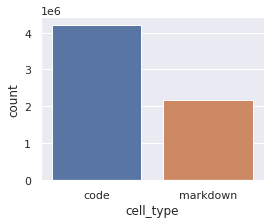

In [ ]:
# 코드가 두배 가까이 더 많다
plt.figure(figsize=(4,3))
sns.countplot(train['cell_type'], order = sorted(train['cell_type'].unique()))

In [ ]:
train.shape[0]

6370646

In [ ]:
# 코드와 마크다운의 분포
markdown = (train['cell_type'].value_counts()['markdown']) / train.shape[0] * 100
code = (train['cell_type'].value_counts()['code']) / train.shape[0] * 100
print("-"*32)
print('Code ({0:.2f}%)'.format(code), 'Markdown ({0:.2f}%)'.format(markdown))
print("-"*32)

--------------------------------
Code (66.00%) Markdown (34.00%)
--------------------------------


In [ ]:
# 코드 유형에서 사용 가능한 데이터

print("-"*100)
print("Code :\n",train[train['cell_type']=='code']['source'].values[0])
print("-"*100)

----------------------------------------------------------------------------------------------------
Code :
 import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import uuid
import os
import scipy
import cv2
from tqdm import tqdm
import math
import ast
sns.set()
----------------------------------------------------------------------------------------------------


In [ ]:
# 마크다운 유형에서 사용 가능한 데이터
# 마크다운에서 크기 키우거나 하는 걸 #으로 쓴다
print("-"*100)
print("Code :\n",train[train['cell_type']=='markdown']['source'].values[10])
print("-"*100)

----------------------------------------------------------------------------------------------------
Code :
 # Gradient Boost Classifier 
----------------------------------------------------------------------------------------------------


**4. Text Data Processing**

코드와 마크다운의 데이터 내용 정리
후속되는 기능을 만들고 정의

- 텍스트를 소문자로 변환
- 숫자, 문장 부호, 하이퍼링크, 불용어 제거
- 텍스트 토큰화

In [ ]:
# 헬퍼 함수 작성 : 
# Python의 문법을 이용하면 한 줄짜리 표현식을 쉽게 작성할 수 있지만 코드가 복잡해지고 읽기 어려워진다
# 복잡한 표현식은 헬퍼 함수로 옮기는게 좋다 특히, 같은 로직을 반복해서 사용해야 할 경우
# if/else 표현식을 이용하면 or나 and같은 bool연산자를 사용할 때보다 읽기 편한 코드를 작성할 수 있다

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = text.strip()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

def clean_code(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.replace('[', ' ').replace(']', ' ').replace('(', ' ').replace(')', ' ').replace('{', ' ').replace('}', ' ').replace('=', ' ').replace(',', ' ')
    text = text.lower()
    text = text.replace('_', '')
    text = text.replace('\n', ' ')
    text = text.replace('.', ' ')
    text = re.sub(r'".*"', ' ', text)
    text = re.sub(r"'.*'", ' ', text)
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

def code_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_code(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
# 코드와 마크다운 변수 생성
markdowns = train[train['cell_type'] == 'markdown']
codes = train[train['cell_type'] == 'code']

In [ ]:
# 새로운 열 source_clean을 생성해 마크다운 및 코드의 데이터에 도우미 함수 적용
# apply : 함수를 적용하겠다는 의미
# lambda : 사용자 정의 함수로 간단한 한줄짜리 코드는 바로 적어줄 수 있지만 길어지면 헬퍼함수를 이용하는 것이 좋다
codes['source_clean'] = codes['source'].apply(str).apply(lambda x: code_preprocessing(x))
markdowns['source_clean'] = markdowns['source'].apply(str).apply(lambda x: text_preprocessing(x))

In [ ]:
train

,id,cell_id,cell_type,source
0,8a2564b730a575,8395ab7c,code,import numpy as np\nimport matplotlib.pyplot a...
1,8a2564b730a575,ebc844d6,code,df_train = pd.read_csv('../input/tensorflow-gr...
2,8a2564b730a575,49251f17,code,"def bbox_inv_iou(boxA, boxB):\n """"""Copied f..."
3,8a2564b730a575,3a6623e3,code,test_sequence_id = np.unique(df_train.sequence...
4,8a2564b730a575,24e09d1a,code,"seq_df_with_cots_ids, stats = find_unique_cots..."
...,...,...,...,...
6370641,a3faba2871daaa,5ce07f7e,markdown,Lets check a random image and its label
6370642,a3faba2871daaa,ad67d1e9,markdown,We can see that there are 5 directories of 5 d...
6370643,a3faba2871daaa,c24be090,markdown,## Also print Misclassified Images:
6370644,a3faba2871daaa,df63943f,markdown,**Normalization**


In [ ]:
# 학습 데이터에 정제한 텍스트 추가
train = pd.concat([codes, markdowns], ignore_index = True)

In [ ]:
# 정제된 데이터 확인
train.head()

,id,cell_id,cell_type,source,source_clean
0,8a2564b730a575,8395ab7c,code,import numpy as np\nimport matplotlib.pyplot a...,import numpy as np import matplotlib pyplot as...
1,8a2564b730a575,ebc844d6,code,df_train = pd.read_csv('../input/tensorflow-gr...,dftrain pd readcsv dftrain
2,8a2564b730a575,49251f17,code,"def bbox_inv_iou(boxA, boxB):\n """"""Copied f...",def bboxinviou boxa boxb xa ya max boxa boxb m...
3,8a2564b730a575,3a6623e3,code,test_sequence_id = np.unique(df_train.sequence...,testsequenceid np unique dftrain sequence prin...
4,8a2564b730a575,24e09d1a,code,"seq_df_with_cots_ids, stats = find_unique_cots...",seqdfwithcotsids stats finduniquecots testsequ...


**5. Text Data Statistics**

In [ ]:
# 정제된 원문에 대한 text_length 및 word_count를 얻기 위해 2개의 새 열 생성
train['text_len'] = train['source_clean'].astype(str).apply(len)
train['text_word_count'] = train['source_clean'].apply(lambda x: len(str(x).split()))

In [ ]:
# View the data 
train.head()

,id,cell_id,cell_type,source,source_clean,text_len,text_word_count
0,8a2564b730a575,8395ab7c,code,import numpy as np\nimport matplotlib.pyplot a...,import numpy as np import matplotlib pyplot as...,191,35
1,8a2564b730a575,ebc844d6,code,df_train = pd.read_csv('../input/tensorflow-gr...,dftrain pd readcsv dftrain,26,4
2,8a2564b730a575,49251f17,code,"def bbox_inv_iou(boxA, boxB):\n """"""Copied f...",def bboxinviou boxa boxb xa ya max boxa boxb m...,1257,206
3,8a2564b730a575,3a6623e3,code,test_sequence_id = np.unique(df_train.sequence...,testsequenceid np unique dftrain sequence prin...,211,20
4,8a2564b730a575,24e09d1a,code,"seq_df_with_cots_ids, stats = find_unique_cots...",seqdfwithcotsids stats finduniquecots testsequ...,190,20


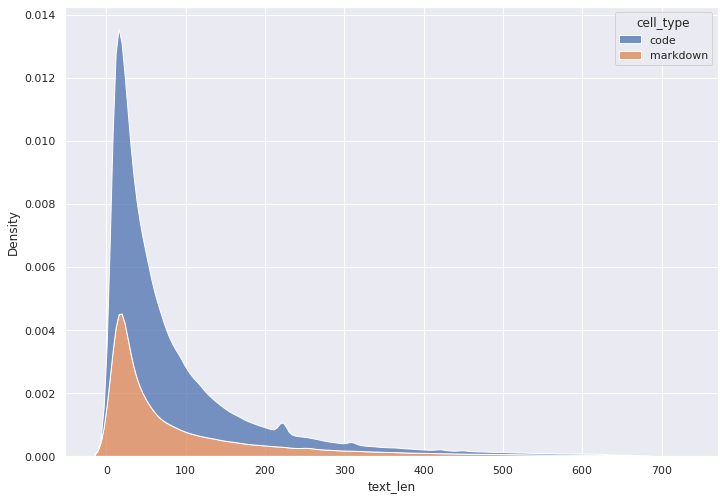

In [ ]:
# plot graph for text length & as you can see most of them prefer to write short text 
# 텍스트 길이에 대한 그래프를 보면 대부분의 사람들이 짧은 텍스트를 작성하는 것을 선호한다는 것을 알수 있다.
# KDE A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
# KDE 커널 밀도 추정 plot은 히스토그램과 유사한 데이터셋에서 관찰된 분포를 시각화 하는 방법이다.
#KDE represents the data using a continuous probability density curve in one or more dimensions.
# KDE는 하나 이상의 차원에서 연속 확률 밀도 곡선을 사용하여 데이터를 나타낸다.
x = train['text_len'].value_counts()
train_sample = train[train['text_len'].isin(x[x>400].index)]
sns.kdeplot(data=train_sample, x="text_len", hue = 'cell_type', shade = True, multiple="stack")
plt.show()

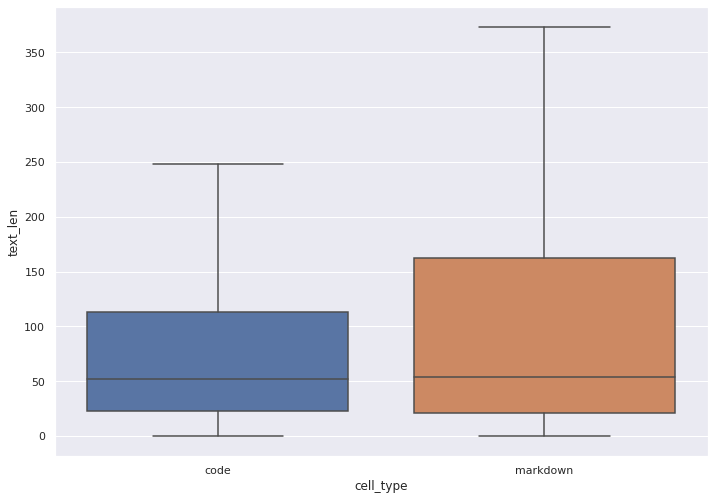

In [ ]:
# box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
# box plot 은 변수 간 또는 범주형 변수 간의 비교를 용이하게 하는 방식으로 정량적 데이터의 분포를 표시한다.
# The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
# 박스는 데이터셋의 사분위수를 표시하고 수염 부분은 분포의 나머지 부분을 표시하도록 확장된다. 단, 이상치는 제외된다.
# Length of Markdowns are longer than codes and median length of markdown is slightly above that of code '
# 마크다운의 길이는 코드보다 길고 마크다운의 중앙값은 코드보다 약간 길다
sns.boxplot(data=train,x = 'cell_type', y="text_len",  showfliers = False)
# sns.swarmplot(data=train,x = 'cell_type', y="text_len", color=".25")
plt.show()

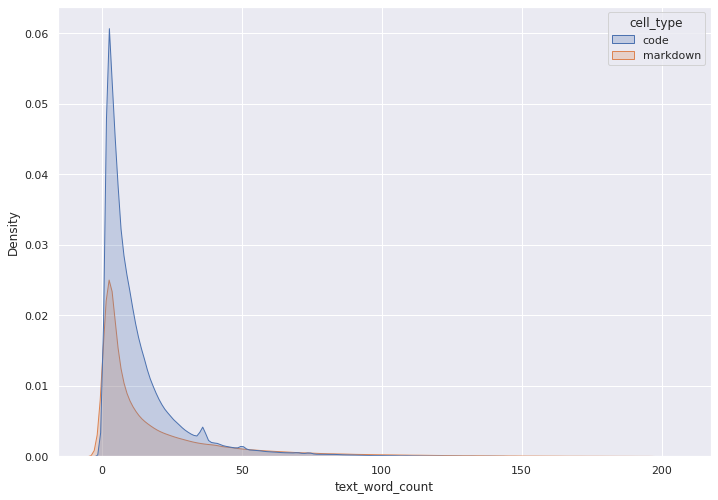

In [ ]:
# 마크다운과 코드의 단어 수에 대한 plot
x = train['text_word_count'].value_counts()
train_sample = train[train['text_word_count'].isin(x[x>400].index)]

sns.kdeplot(data=train_sample, x="text_word_count", hue = 'cell_type', shade = True)
plt.show()

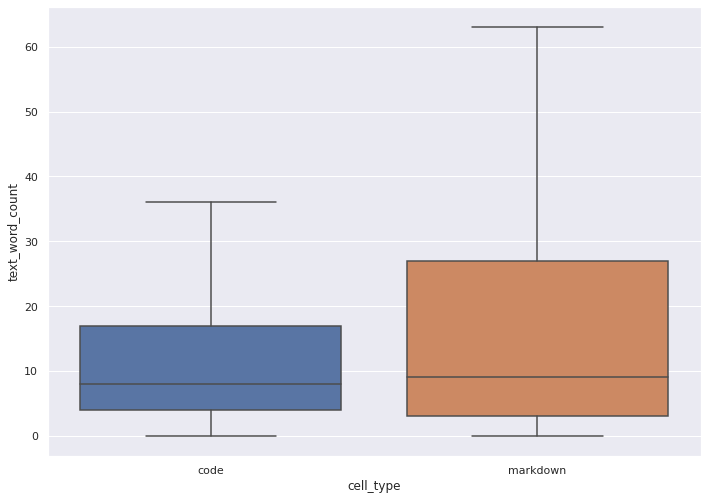

In [ ]:
# 마크다운의 개수는 코드보다 길고 마크다운의 중간 밀도는 코드보다 약간 높다
sns.boxplot(data=train,x = 'cell_type', y="text_word_count", showfliers = False)
plt.show()

**6. N-GRAMS**

N-gram은 문서에서 단어나 기호 또는 토큰의 연속적인 시퀀스다.
기술적인 용어로 문서에서 항목의 인접 시퀀스로 정의할 수 있다.
NLP(자연어 처리) 작업에서 텍스트 데이터를 처리할 때 사용한다.

n-gram은 'n'이 취하는 값에 따라 다음과 같은 유형으로 분류된다.

1 - unigram 2 - bigram 3 - trigram n - ngram

**1) unigram**

In [ ]:
# 상위 단어를 가져오는 헬퍼 함수 정의

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
markdowns = train[train['cell_type'] == 'markdown']
codes = train[train['cell_type'] == 'code']

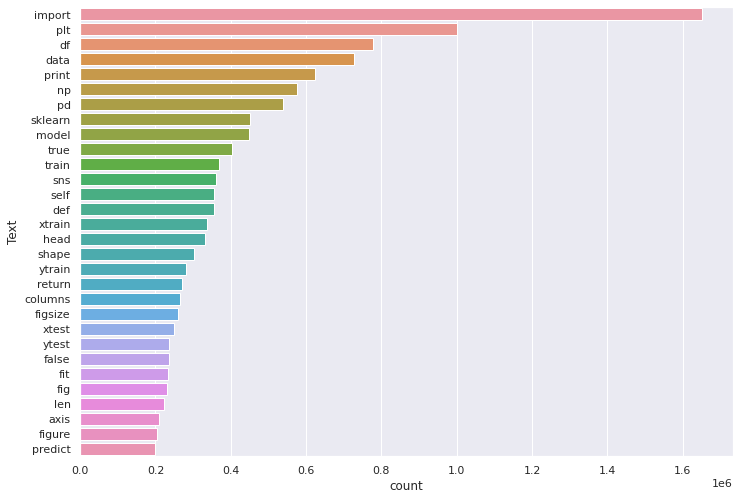

In [ ]:
codes_unigrams = get_top_n_words(codes['source_clean'],30)

data = pd.DataFrame(codes_unigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

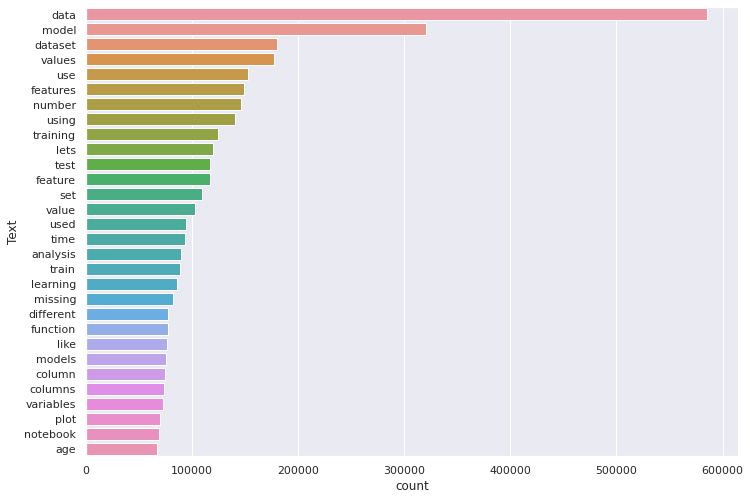

In [ ]:
markdowns_unigrams = get_top_n_words(markdowns['source_clean'],30)

data = pd.DataFrame(markdowns_unigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

**2) bigram**

In [ ]:
# 상위 단어 헬퍼함수 정의

def get_top_n_words(corpus, ngram_range, n=None):
    
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

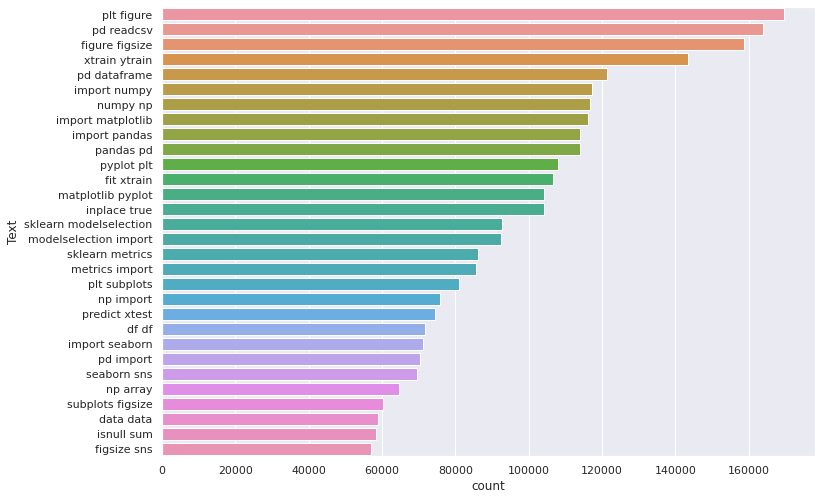

In [ ]:
codes_bigrams = get_top_n_words(codes['source_clean'],(2,2),30)

data = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

In [ ]:
markdowns_bigrams = get_top_n_words(markdowns['source_clean'],(2,2),30)

data = pd.DataFrame(markdowns_bigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
codes_trigrams = get_top_n_words(codes['source_clean'],(3,3),30)

data = pd.DataFrame(codes_trigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

In [ ]:
markdowns_trigrams = get_top_n_words(markdowns['source_clean'],(3,3),30)

data = pd.DataFrame(markdowns_trigrams, columns = ['Text' , 'count'])
data = data.groupby('Text').sum()['count'].sort_values(ascending=False)
data = pd.DataFrame(data).reset_index()
sns.barplot(y = 'Text', x = 'count', data = data)
plt.show()

**7. Word Cloud**

워드 클라우드(태그 클라우드)는 단어를 시각적으로 표현한다.
클라우드 제작자는 빈도와 관련성을 기반으로 인기 있는 단어와 구문을 강조 표시하는 데 사용한다. 보다 심층적인 분석으로 이어질 수 있는 빠르고 간단한 시각적 통찰력을 제공한다.

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000000,
        max_font_size=40, 
        scale=2,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
print("Word Cloud for Codes")
show_wordcloud(codes['source_clean'].values)

In [ ]:
print("\nWord Cloud for Markdowns")
show_wordcloud(markdowns['source_clean'].values)